### ECG Signal Classification (5 classes) 
This file shows how  to load the data and get X_train, Y_train, X_test, Y_test

In [2]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')
#no missing values in the data

In [5]:
#convert dataframe to numpy array
X=X.values
X.shape 

(3841, 187)

In [6]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [7]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

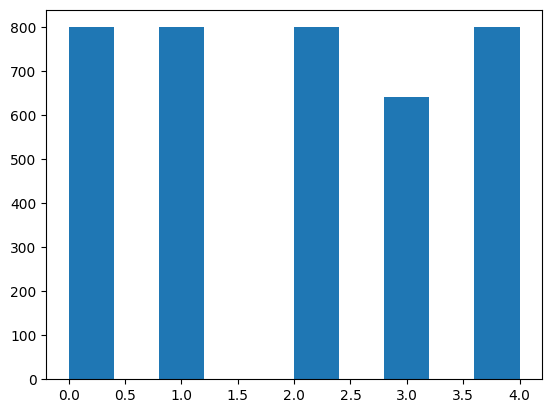

In [8]:
plt.hist(Y)

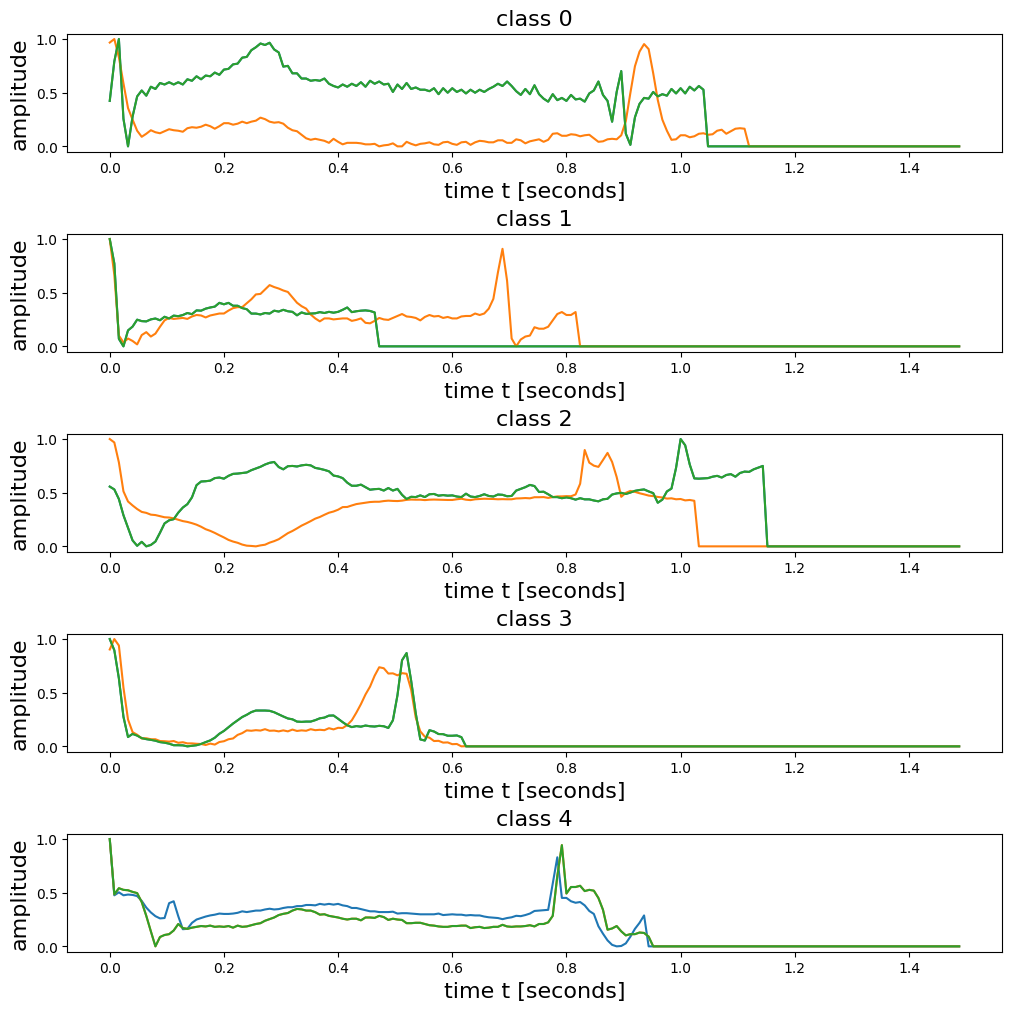

In [9]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

Split the data into a training set and a test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state=0)

In [11]:
X_train.shape
#3072 samples in the training set, each sample has 187 elements

(2160, 187)

In [12]:
[X_train.min(), X_train.max()] #no need for normalization

[0.0, 1.0]

In [13]:
Y_train.shape

(2160,)

In [14]:
[Y_train.min(), Y_train.max()] #5 classes

[0, 4]

In [15]:
X_test.shape
#769 samples in the training set, each sample has 187 elements

(961, 187)

In [16]:
[X_test.min(), X_test.max()] #no need for normalization

[0.0, 1.0]

In [17]:
Y_test.shape

(961,)

In [18]:
[Y_test.min(), Y_test.max()] #5 classes

[0, 4]

In [19]:
#KNEIGHBOR CLASSIFIER 
from sklearn.neighbors import KNeighborsRegressor
KNC_model = KNeighborsRegressor()
KNC_model.fit(X_train, Y_train) 

KNC_train = KNC_model.score(X_train, Y_train)
KNC_test = KNC_model.score(X_test, Y_test)

print('training accuracy=', KNC_train)
print('testing accuracy=', KNC_test)

training accuracy= 0.8413460479735209
testing accuracy= 0.774346503263296


In [20]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# instance of the regressor
logistic_model = LogisticRegression(fit_intercept=True, solver='newton-cg', max_iter=1000) 
logistic_model.fit(X_train, Y_train)

#coefficient of determination R^2 on training set
logistic_train = logistic_model.score(X_train, Y_train)

#coefficient of determination R^2 on testing set
logistic_test = logistic_model.score(X_test, Y_test)

print('training accuracy=', logistic_train)
print('testing accuracy=', logistic_test)


training accuracy= 0.7662037037037037
testing accuracy= 0.7513007284079084


In [21]:
#DECISION TREE CLASSIFIER 
from sklearn.tree import DecisionTreeClassifier
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, Y_train)

DTC_train = DTC_model.score(X_train, Y_train)
DTC_test= DTC_model.score(X_test, Y_test)

print('training accuracy=', DTC_train)
print('testing accuracy=', DTC_test)

training accuracy= 1.0
testing accuracy= 0.7991675338189386


In [22]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, Y_train)

RFC_train = RFC_model.score(X_train, Y_train)
RFC_test = RFC_model.score(X_test, Y_test)

print('training accuracy=', RFC_train)
print('testing accuracy=', RFC_test)

training accuracy= 1.0
testing accuracy= 0.9021852237252862


In [23]:
#Table 

data = {
   "KNeighborsClassifier": [KNC_train, KNC_test],
   "LogisticRegression": [logistic_train, logistic_test],
   "DecisionTreeClassifier": [DTC_train, DTC_test],
   "RandomForestClassifier": [RFC_train, RFC_test]
}
df = pd.DataFrame(data)

df.style \
  .format(precision=10, thousands=".", decimal=".") \
  .format_index(str, axis=1) \
  .relabel_index(["training accuracy", "test accuracy"], axis=0)
  

,KNeighborsClassifier,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
training accuracy,0.8413460480,0.7662037037,1.0000000000,1.0000000000
test accuracy,0.7743465033,0.7513007284,0.7991675338,0.9021852237
